In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline

In [2]:
# Load the data
dt = pd.read_csv('../data/nam_processed_data.csv')
print(dt.head())

# Prepare the features and target
X = dt.drop(['price_in_USD'], axis='columns')
Y = dt['price_in_USD']

   bhk  area  status  price_in_USD  house_type  new  region_Agripada  \
0    2   650       1      314400.0           0    0             True   
1    1   803       0      270000.0           0    0             True   
2    1   684       0      204000.0           0    0             True   
3    1   545       0      192000.0           0    0             True   
4    2  1650       0      420000.0           0    0             True   

   region_Airoli  region_Ambernath East  region_Ambernath West  ...  \
0          False                  False                  False  ...   
1          False                  False                  False  ...   
2          False                  False                  False  ...   
3          False                  False                  False  ...   
4          False                  False                  False  ...   

   region_Vangani  region_Vasai  region_Vashi  region_Vikhroli  \
0           False         False         False            False   
1       

In [3]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
X_k, X_val, Y_k, Y_val = train_test_split(X, Y, test_size=0.3, random_state=10)

In [4]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [26]:
# Train an Elastic Net model with cross-validation to find the best alpha and l1_ratio
reg_elasticnet_cv = ElasticNetCV(cv=5, random_state=0, l1_ratio=[.1, .5, .7, .9, .95, .99, 1]).fit(X_train_scaled, Y_train)

# Print the best alpha and l1_ratio found by ElasticNetCV
print(f"Best alpha: {reg_elasticnet_cv.alpha_}")
print(f"Best l1_ratio: {reg_elasticnet_cv.l1_ratio_}")

Best alpha: 157.20711269357932
Best l1_ratio: 1.0


In [25]:
# Get the best alpha and l1_ratio
best_alpha = elastic_net_cv.alpha_
best_l1_ratio = elastic_net_cv.l1_ratio_
print(f"Best alpha: {best_alpha}")
print(f"Best l1_ratio: {best_l1_ratio}")

Best alpha: 1e-06
Best l1_ratio: 1.0


In [23]:
# Initialize the Elastic Net model with the best alpha and l1_ratio
reg_elasticnet = ElasticNet(alpha=reg_elasticnet_cv.alpha_, l1_ratio=reg_elasticnet_cv.l1_ratio_)
reg_elasticnet.fit(X_train_scaled, Y_train)

ElasticNet(alpha=157.20711269357932, l1_ratio=1.0)

In [24]:
# Evaluate the model on the test set
score = reg_elasticnet.score(X_test_scaled, Y_test)
print("R-squared on the test set:", score)

R-squared on the test set: 0.8677047703684972


In [27]:
# Calculate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    reg_elasticnet, X_train_scaled, Y_train, cv=4, train_sizes=np.linspace(0.1, 1.0, 10), scoring="r2"
)


In [28]:
# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Print the training scores and cross-validation scores
print("Training scores:\n", train_scores)
print("Cross-validation scores:\n", val_scores)

# Print the mean and standard deviation of training and cross-validation scores
print("Mean training scores:\n", train_scores_mean)
print("Mean cross-validation scores:\n", val_scores_mean)

Training scores:
 [[0.8800565  0.87834945 0.87834945 0.87834945]
 [0.88650547 0.87124548 0.87124548 0.87124548]
 [0.8758367  0.87963456 0.87963456 0.87963456]
 [0.86379421 0.87068706 0.874738   0.874738  ]
 [0.86186691 0.8687314  0.87585683 0.87585683]
 [0.85319591 0.85967771 0.87386443 0.87386443]
 [0.85025623 0.85612911 0.86556233 0.86898287]
 [0.85126862 0.85556056 0.86512599 0.86900034]
 [0.85448003 0.85792731 0.86687715 0.8615235 ]
 [0.85234199 0.85514658 0.86226375 0.86061379]]
Cross-validation scores:
 [[0.82773901 0.8546144  0.80943334 0.82110504]
 [0.83497326 0.86480314 0.83171139 0.83414628]
 [0.84344794 0.86666136 0.829656   0.83423508]
 [0.87048196 0.85754248 0.83187887 0.82635289]
 [0.87115388 0.8559147  0.83063328 0.82602363]
 [0.87060131 0.8557139  0.83241977 0.83004928]
 [0.86852395 0.85227596 0.83624769 0.83261797]
 [0.86745712 0.85694258 0.83501519 0.8339096 ]
 [0.86763845 0.85831246 0.83480096 0.83988033]
 [0.86506541 0.85730081 0.83614074 0.83740134]]
Mean training 

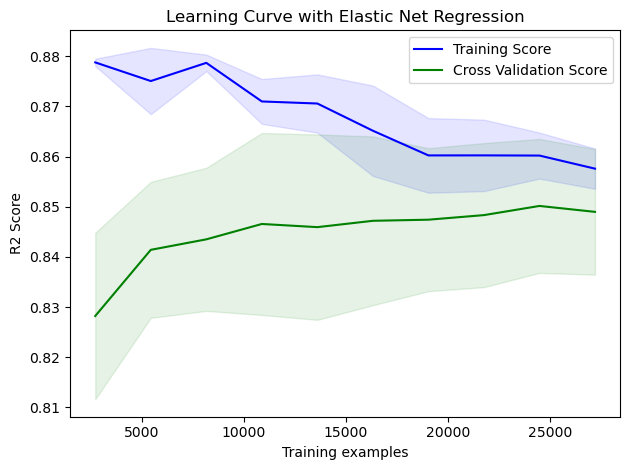

In [29]:
# Plot the learning curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, label="Training Score", color='b')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='b', alpha=0.1)
plt.plot(train_sizes, val_scores_mean, label="Cross Validation Score", color='g')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, color='g', alpha=0.1)

# Adding titles and labels
plt.title("Learning Curve with Elastic Net Regression")
plt.xlabel("Training examples")
plt.ylabel("R2 Score")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

R-squared on the training set: 0.8563027565252108
       actual value      predicted     difference
24961      105912.0  175590.795900  -69678.795900
40922       75588.0   44745.817931   30842.182069
12323       40800.0   10368.204656   30431.795344
5755       442800.0  567406.082748 -124606.082748
15411      388800.0  542293.015056 -153493.015056
...             ...            ...            ...
9629       264000.0  304132.602985  -40132.602985
7325       102000.0   98144.189397    3855.810603
1218       178800.0  135904.139247   42895.860753
31936      103200.0  130010.537704  -26810.537704
3093       420000.0  463876.419023  -43876.419023

[9069 rows x 3 columns]


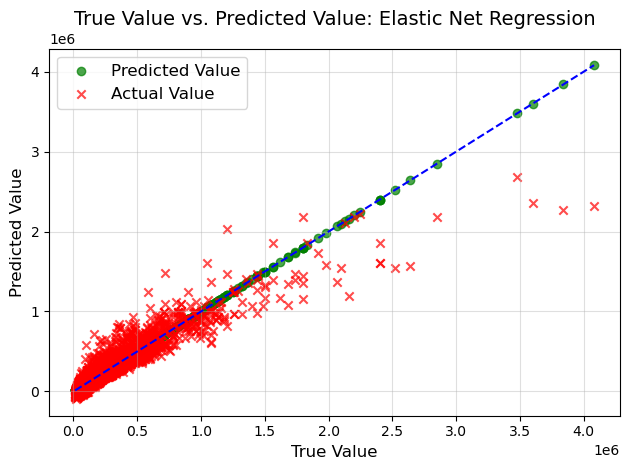

R-squared on the validation set: -630254.7866560321


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


In [33]:
# Evaluate the model on the training set
train_score = reg_elasticnet.score(X_train_scaled, Y_train)
print("R-squared on the training set:", train_score)

# Predict on the test set
Y_pred = reg_elasticnet.predict(X_test_scaled)

# Create a DataFrame to compare actual and predicted values
pred_table = pd.DataFrame(data={"actual value": Y_test, "predicted": Y_pred})
pred_table["difference"] = pred_table["actual value"] - pred_table["predicted"]
print(pred_table)

# Scatter plot for Y_test (green) and Y_pred (red)
plt.scatter(Y_test, Y_test, c='green', marker='o', label='Predicted Value', alpha=0.7)
plt.scatter(Y_test, Y_pred, c='red', marker='x', label='Actual Value', alpha=0.7)

# Add labels and title
plt.xlabel("True Value", fontsize=12)
plt.ylabel("Predicted Value", fontsize=12)
plt.title("True Value vs. Predicted Value: Elastic Net Regression", fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Add a diagonal line (perfect prediction line)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='blue')

# Grid for better readability
plt.grid(alpha=0.4)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

# Evaluate the model on the validation set
val_score = reg_elasticnet.score(X_val, Y_val)
print("R-squared on the validation set:", val_score)